#### Кафедра дискретной математики МФТИ

#### Курс математической статистики

Игашов Илья, 593 групппа

#  Задание №2

## №2. (К теоретической задаче 5)

Сгенерируйте выборку $X_1,\dots, X_N$ из экспоненциального распределения с параметром $\theta=1$ для $N = 10^4$. Для всех $n\leq N$ посчитайте оценку $(k!/\bar{X^k})^{1/k}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком $k$ оценка ведет себя лучше (рассмотрите не менее 10 различных значений $k$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from math import factorial

%matplotlib inline 

In [2]:
N = 10000

# Cгенерируем выборку с параметром theta = 1.
theta = 1
sample = expon.rvs(size=N, scale=theta)

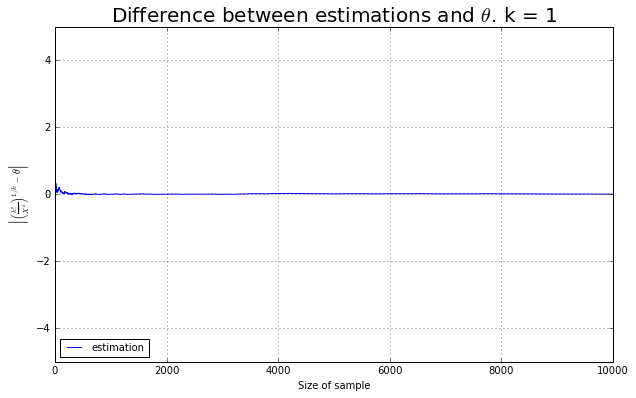

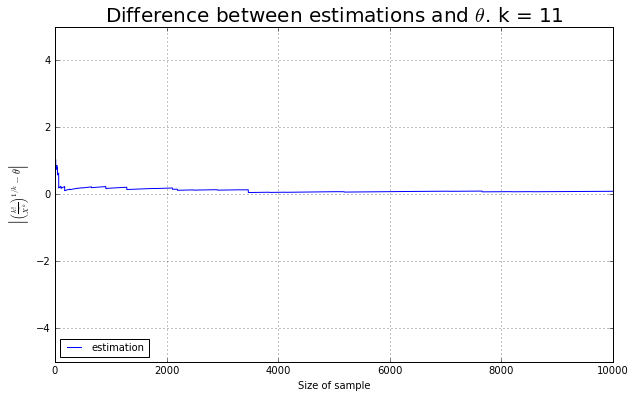

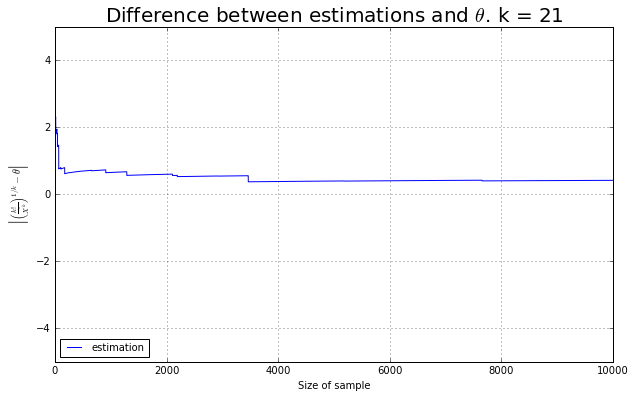

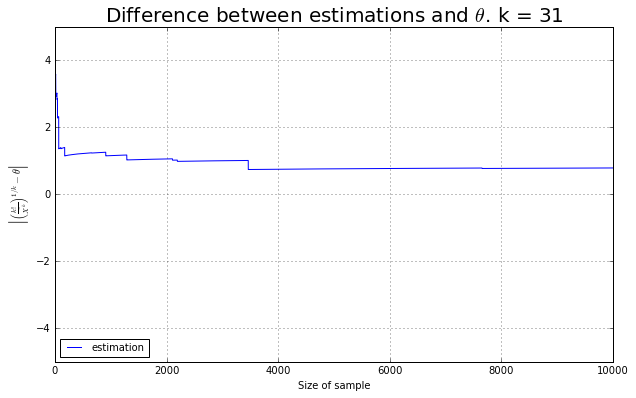

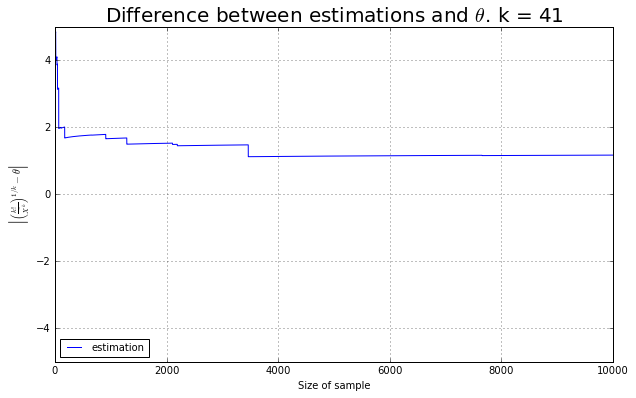

In [3]:
# Для различных k посмотрим на разность оценки и истинного значения theta.
for k in range(1, 50, 10):
    # Считаем оценку параметра theta для всех n.
    k_moment = sample ** k
    estimation = (factorial(k) / (k_moment.cumsum() / [n for n in range(1, N + 1, 1)]) ) ** (1/k)
    
    # Строим график функции модуля разности оценки и истинного значения theta.
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(1, N, N), abs(estimation - theta), label="estimation")

    plt.title(r'Difference between estimations and $\theta$. k = ' + str(k), fontsize=20)
    plt.xlabel(r'Size of sample', fontsize='10')
    plt.ylabel(r'$\left|\left(\frac{k!}{\bar{X^k}}\right)^{1/k} - \theta\right|$', fontsize='10')
    plt.legend(fontsize=10, loc=3)
    plt.ylim(-5, 5)
    plt.grid()
    plt.show()

Из графиков видно, что более точная оценка достигается при $k\in \{1,\dots, 15\}$.

Построим графики для каждого из этих значений $k$ в новом масшатабе.

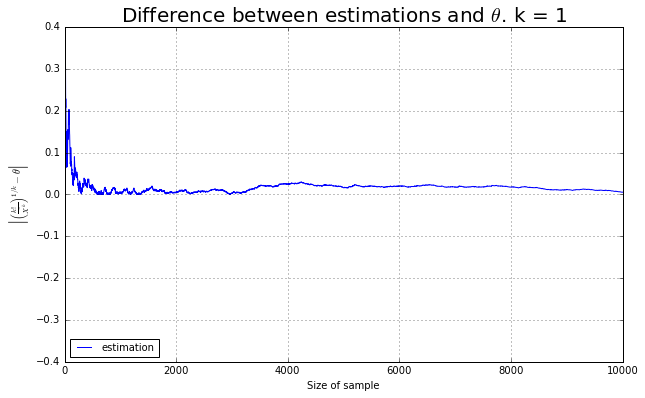

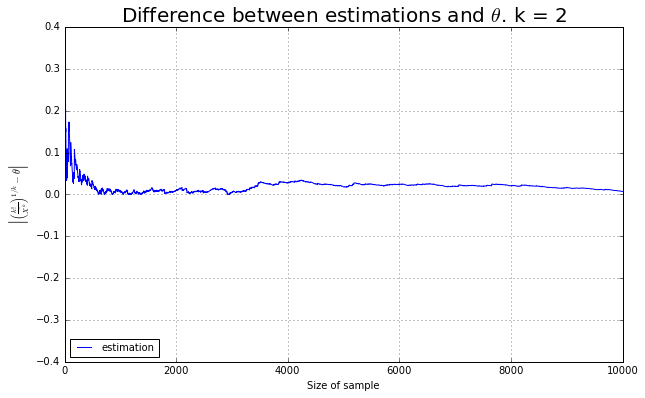

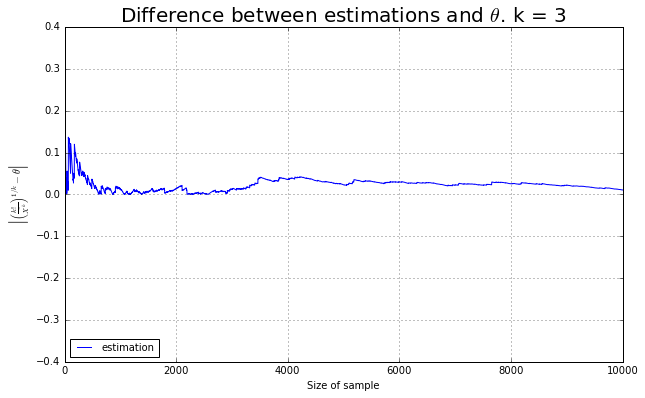

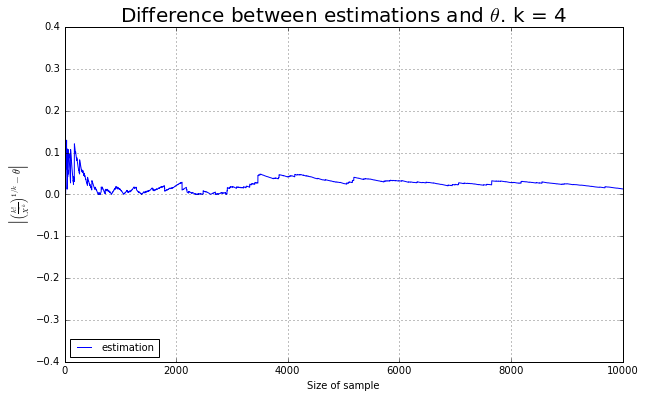

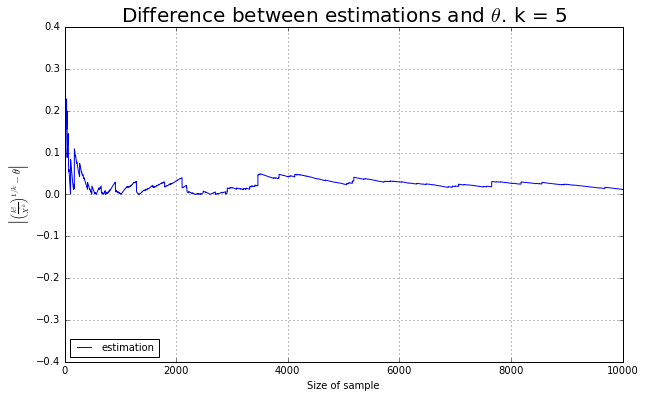

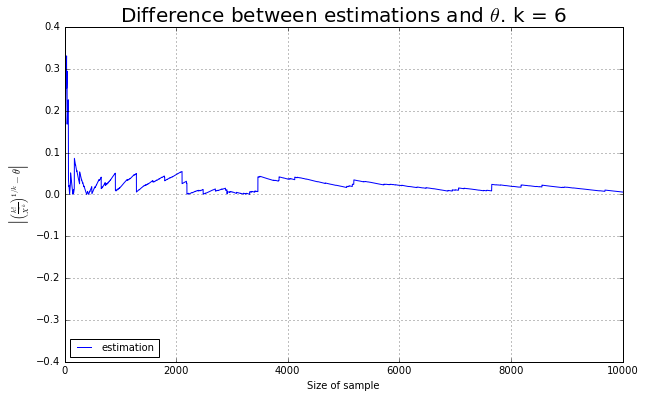

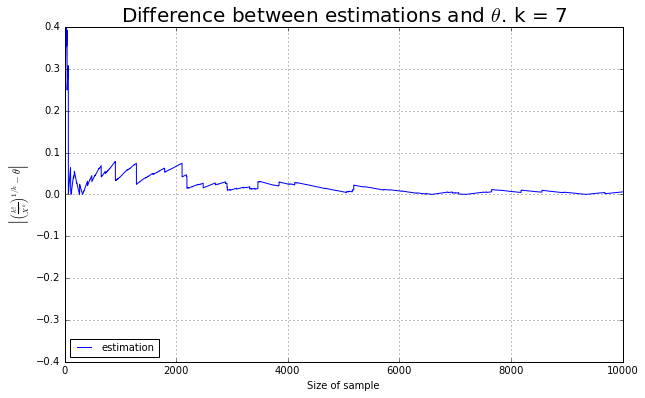

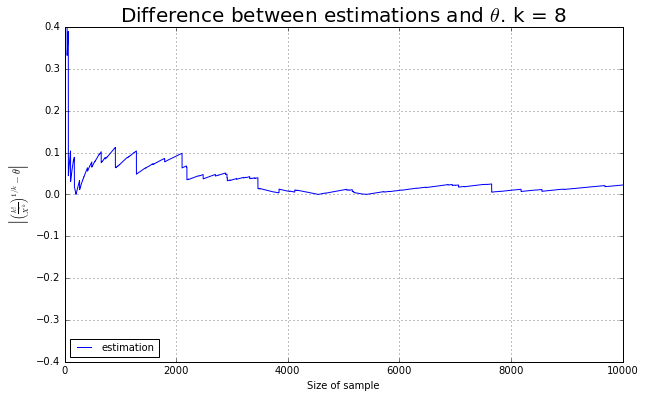

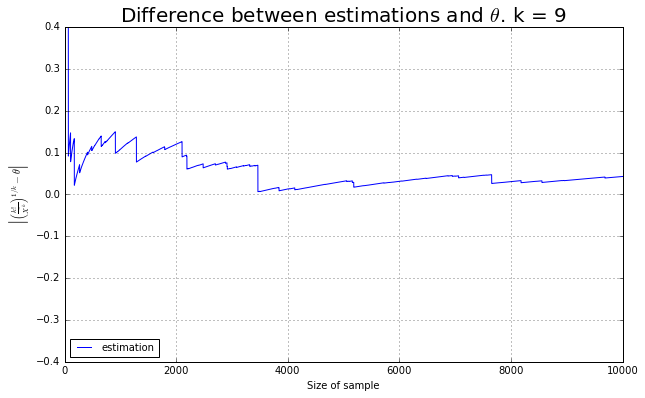

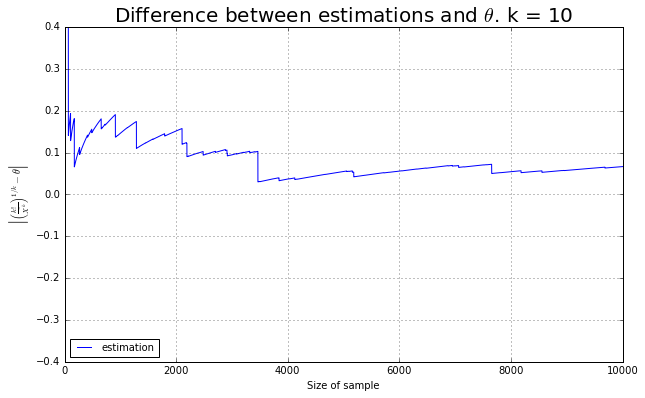

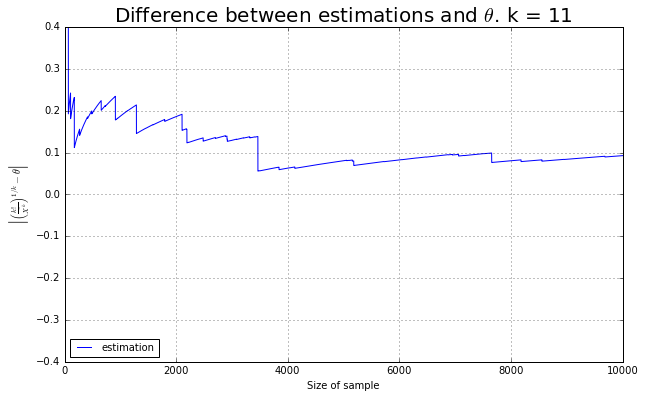

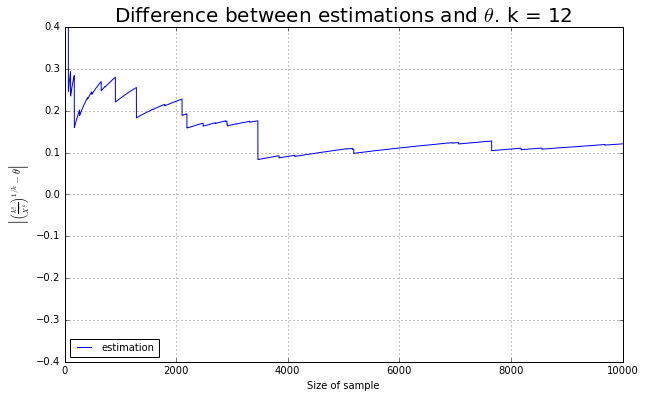

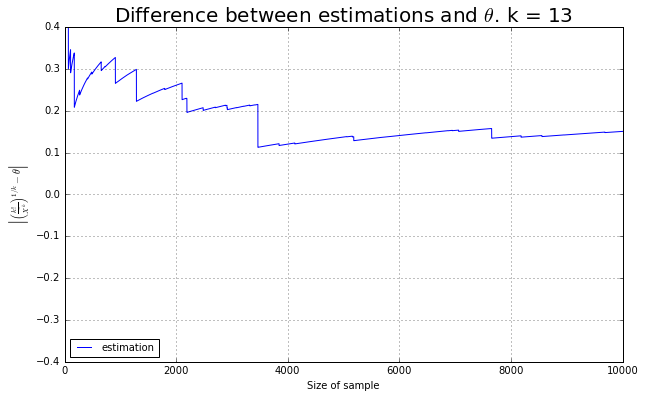

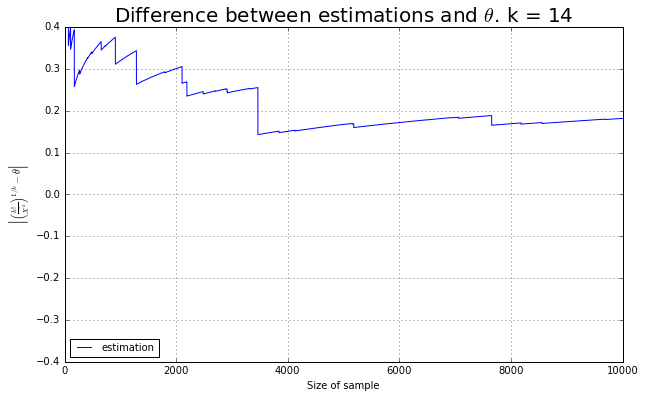

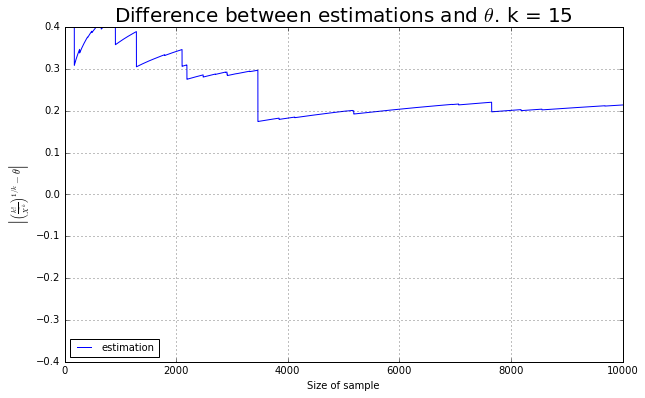

In [4]:
for k in range(1, 16, 1):
    # Считаем оценку параметра theta для всех n.
    k_moment = sample ** k
    estimation = (factorial(k) / (k_moment.cumsum() / [n for n in range(1, N + 1, 1)]) ) ** (1/k)

    # Строим график функции модуля разности оценки и истинного значения theta.
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(1, N, N), abs(estimation - theta), label="estimation")

    plt.title(r'Difference between estimations and $\theta$. k = ' + str(k), fontsize=20)
    plt.xlabel(r'Size of sample', fontsize='10')
    plt.ylabel(r'$\left|\left(\frac{k!}{\bar{X^k}}\right)^{1/k} - \theta\right|$', fontsize='10')
    plt.legend(fontsize=10, loc=3)
    plt.ylim(-0.4, 0.4)
    plt.grid()
    plt.show()

# Вывод:

Мы провели эксперименты по исследованию оценки $(k!/\bar{X^k})^{1/k}$ для выборки $X_1\dots X_N \sim Exp(\theta),\ \theta=1$.

По полученным графикам можно сделать вывод, что при достаточно больших $n$ данная оценка получается наиболее точной при $k\in \{1,\dots,7\}$.